# Classification - Part 1

## by Farzad Minooei

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import mplfinance as fplt

## Read Data from Yahoo Finance API

In [2]:
#Get data directly from Yahoo Finance website: 
#https://uk.finance.yahoo.com/most-active

In [3]:
#Install Pandas Module needed to Connect to Yahoo Finance API
#%pip install pandas-datareader
import pandas_datareader as pdr

In [4]:
#Load data from Yahoo Finance API
data = pdr.get_data_yahoo("^GSPC", start = "2017-01-01", end = "2019-12-31")

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(754, 6)

In [7]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902


In [8]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


In [9]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02,754.000000
mean,2713.816074,2690.802003,2702.881962,2703.161458,3.521879e+09,2703.161458
std,228.608279,226.769057,227.707955,227.623908,6.008277e+08,227.623908
min,2263.879883,2245.129883,2251.570068,2257.830078,1.296540e+09,2257.830078
25%,2508.452576,2492.394897,2499.052429,2502.632507,3.199362e+09,2502.632507
50%,2737.955078,2709.359985,2722.655029,2723.530029,3.451220e+09,2723.530029
75%,2890.990051,2862.282593,2877.170044,2879.137390,3.770528e+09,2879.137390
max,3247.929932,3234.370117,3247.229980,3240.020020,7.609010e+09,3240.020020


## Data Visualization of Financial Data

Time series / date functionality in Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [10]:
data.loc['2017-01-04', :]

High         2.272820e+03
Low          2.261600e+03
Open         2.261600e+03
Close        2.270750e+03
Volume       3.764890e+09
Adj Close    2.270750e+03
Name: 2017-01-04 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

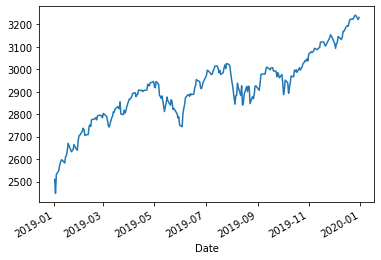

In [11]:
data.loc['2019', 'Close'].plot()

<AxesSubplot:xlabel='Date'>

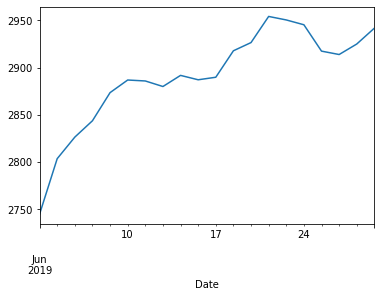

In [12]:
data.loc['2019-06', 'Close'].plot()

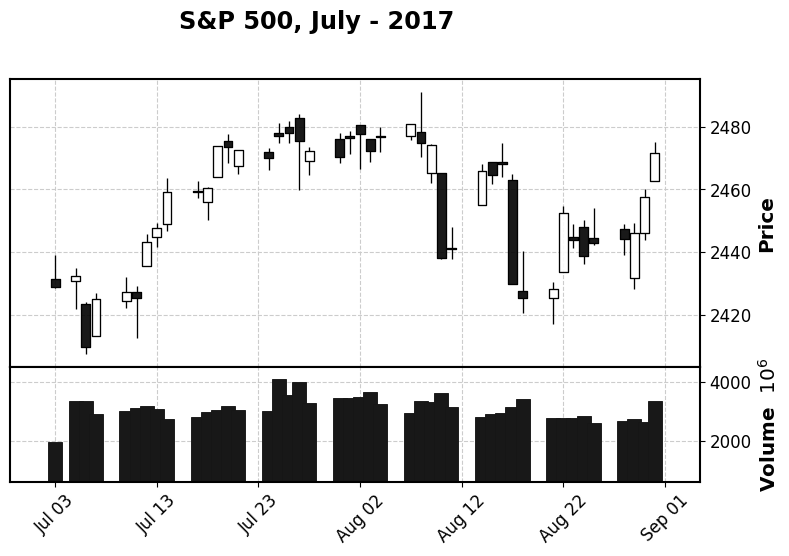

In [13]:
#Candlestick
fplt.plot(data.loc['2017-07-1': '2017-08-31', :], type = 'candle', 
          style = 'classic', volume  = True, show_nontrading = True,
           figratio = (10,6), title = 'S&P 500, July - 2017')

Technical Analysis Library in Python

https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html

In [14]:
import ta

In [15]:
#Simple Moving Average(SMA)
# https://www.investopedia.com/terms/s/sma.asp
sma = ta.trend.sma_indicator(data['Close'], 20)

In [16]:
sma.head()

Date
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
2017-01-09   NaN
Name: sma_20, dtype: float64

In [17]:
sma.tail()

Date
2019-12-24    3160.743481
2019-12-26    3165.712976
2019-12-27    3170.032483
2019-12-30    3174.047986
2019-12-31    3179.893481
Name: sma_20, dtype: float64

In [18]:
#Exponential Moving Average(EMA)
# https://www.investopedia.com/terms/e/ema.asp
ema = ta.trend.ema_indicator(data['Close'], 20)

In [19]:
ema.tail()

Date
2019-12-24    3167.808671
2019-12-26    3174.675456
2019-12-27    3180.898747
2019-12-30    3184.745537
2019-12-31    3189.129774
Name: ema_20, dtype: float64

In [20]:
#Relative Strength Index (RSI)
# https://www.investopedia.com/terms/r/rsi.asp
rsi = ta.momentum.rsi(data['Close'], 14)

In [21]:
rsi.tail()

Date
2019-12-24    75.832040
2019-12-26    78.415059
2019-12-27    78.431595
2019-12-30    68.779008
2019-12-31    70.743661
Name: rsi, dtype: float64

## Data Preparation

In [22]:
data['rsi'] = rsi

In [23]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,rsi
Date,,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,75.832040
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,78.415059
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,78.431595
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,68.779008
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,70.743661


In [24]:
#Calculate daily return
data['d_return'] = 0

In [25]:
for i in range(1, data.shape[0]):
    data.iloc[i, 7] = data.iloc[i, 3]/data.iloc[i - 1, 3] - 1

In [26]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return
Date,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549


In [27]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return
Date,,,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,75.832040,-0.000195
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,78.415059,0.005128
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,78.431595,0.000034
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,68.779008,-0.005781
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,70.743661,0.002946


In [28]:
#Calculate volume change
data['volume_change'] = 0

In [29]:
for i in range(1, data.shape[0]):
    data.iloc[i, 8] = data.iloc[i, 4]/data.iloc[i - 1, 4] - 1

In [30]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change
Date,,,,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,75.832040,-0.000195,-0.576379
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,78.415059,0.005128,0.666497
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,78.431595,0.000034,0.124030
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,68.779008,-0.005781,0.240716
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,70.743661,0.002946,-0.039651


<AxesSubplot:xlabel='Date'>

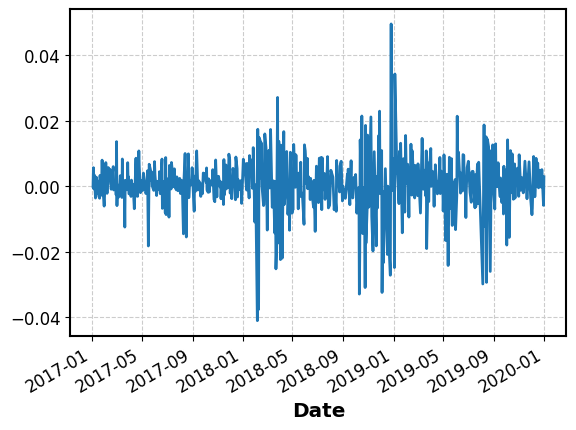

In [31]:
#Plot daily return
data['d_return'].plot()

<AxesSubplot:xlabel='d_return', ylabel='Probability'>

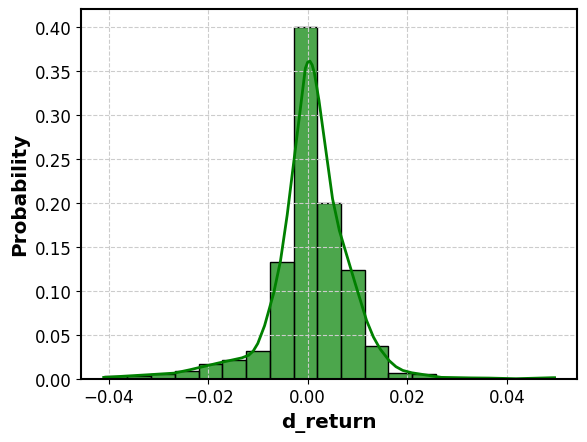

In [32]:
#Plot daily return
sns.histplot(data['d_return'], stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(data.d_return), max(data.d_return), 20))

In [33]:
data['d_return'].describe()

count    754.000000
mean       0.000508
std        0.008060
min       -0.040979
25%       -0.002236
50%        0.000691
75%        0.004511
max        0.049594
Name: d_return, dtype: float64

<AxesSubplot:xlabel='volume_change', ylabel='Probability'>

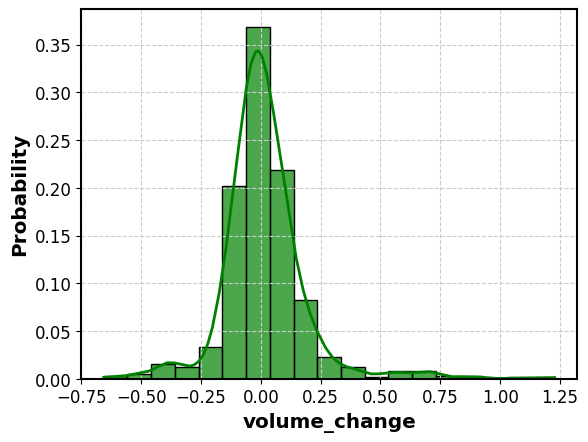

In [34]:
#Plot daily volume change
sns.histplot(data['volume_change'], stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(data.volume_change), max(data.volume_change), 20))

In [35]:
#Add lags
data.head()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change
Date,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612


In [36]:
#daily return lags
#lag_1
data['r_lag1'] = 0
for i in range(2, data.shape[0]):
    data.iloc[i, 9] = data.iloc[i - 1, 7]

In [37]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1
Date,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815,0.005722
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161,-0.000771
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612,0.003517


In [38]:
#lag_2
data['r_lag2'] = 0
for i in range(3, data.shape[0]):
    data.iloc[i, 10] = data.iloc[i - 2, 7]

In [39]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2
Date,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,0.000000,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000,0.000000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815,0.005722,0.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161,-0.000771,0.005722
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612,0.003517,-0.000771


In [40]:
#lag_3
data['r_lag3'] = 0
for i in range(4, data.shape[0]):
    data.iloc[i, 11] = data.iloc[i - 3, 7]

In [41]:
#lag_4
data['r_lag4'] = 0
for i in range(5, data.shape[0]):
    data.iloc[i, 12] = data.iloc[i - 4, 7]

In [42]:
#lag_5
data['r_lag5'] = 0
for i in range(6, data.shape[0]):
    data.iloc[i, 13] = data.iloc[i - 5, 7]

In [43]:
data.head(15)

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5
Date,,,,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815,0.005722,0.000000,0.000000,0.000000,0.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161,-0.000771,0.005722,0.000000,0.000000,0.000000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612,0.003517,-0.000771,0.005722,0.000000,0.000000
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,2268.899902,NaN,0.000000,0.130898,-0.003549,0.003517,-0.000771,0.005722,0.000000
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,2275.320068,NaN,0.002830,-0.005051,0.000000,-0.003549,0.003517,-0.000771,0.005722
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,2270.439941,NaN,-0.002145,-0.043719,0.002830,0.000000,-0.003549,0.003517,-0.000771
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,2274.639893,NaN,0.001850,-0.110007,-0.002145,0.002830,0.000000,-0.003549,0.003517


In [44]:
#Volume change lag
#lag_1
data['v_lag1'] = 0
for i in range(2, data.shape[0]):
    data.iloc[i, 14] = data.iloc[i - 1, 8]

In [45]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1
Date,,,,,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815,0.005722,0.000000,0.000000,0.0,0.0,-0.001496
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161,-0.000771,0.005722,0.000000,0.0,0.0,-0.000815
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612,0.003517,-0.000771,0.005722,0.0,0.0,-0.112161


In [46]:
#lag_2
data['v_lag2'] = 0
for i in range(3, data.shape[0]):
    data.iloc[i, 15] = data.iloc[i - 2, 8]

#lag_3
data['v_lag3'] = 0
for i in range(4, data.shape[0]):
    data.iloc[i, 16] = data.iloc[i - 3, 8]
    
#lag_4
data['v_lag4'] = 0
for i in range(5, data.shape[0]):
    data.iloc[i, 17] = data.iloc[i - 4, 8]
    
#lag_5
data['v_lag5'] = 0
for i in range(6, data.shape[0]):
    data.iloc[i, 18] = data.iloc[i - 5, 8]

In [47]:
data.head(10)

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815,0.005722,0.000000,0.000000,0.000000,0.000000,-0.001496,0.000000,0.000000,0.000000,0.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161,-0.000771,0.005722,0.000000,0.000000,0.000000,-0.000815,-0.001496,0.000000,0.000000,0.000000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612,0.003517,-0.000771,0.005722,0.000000,0.000000,-0.112161,-0.000815,-0.001496,0.000000,0.000000
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,2268.899902,NaN,0.000000,0.130898,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.036612,-0.112161,-0.000815,-0.001496,0.000000
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,2275.320068,NaN,0.002830,-0.005051,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.130898,-0.036612,-0.112161,-0.000815,-0.001496
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,2270.439941,NaN,-0.002145,-0.043719,0.002830,0.000000,-0.003549,0.003517,-0.000771,-0.005051,0.130898,-0.036612,-0.112161,-0.000815
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,2274.639893,NaN,0.001850,-0.110007,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.043719,-0.005051,0.130898,-0.036612,-0.112161


In [48]:
#Market trend
#This method is good for complex conditions(here we have simple conditions!)
#create a list of conditions
conditions = [data['d_return'] <= 0,
              data['d_return'] > 0]

#create a list of the values needed to assign for each condition
values = [0, 1]

#create a new column and use np.select to assign values to it using the lists as arguments
data['trend'] = np.select(conditions, values)
data.head(10)

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,NaN,-0.000771,-0.000815,0.005722,0.000000,0.000000,0.000000,0.000000,-0.001496,0.000000,0.000000,0.000000,0.000000,0
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,NaN,0.003517,-0.112161,-0.000771,0.005722,0.000000,0.000000,0.000000,-0.000815,-0.001496,0.000000,0.000000,0.000000,1
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,NaN,-0.003549,-0.036612,0.003517,-0.000771,0.005722,0.000000,0.000000,-0.112161,-0.000815,-0.001496,0.000000,0.000000,0
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,2268.899902,NaN,0.000000,0.130898,-0.003549,0.003517,-0.000771,0.005722,0.000000,-0.036612,-0.112161,-0.000815,-0.001496,0.000000,0
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,2275.320068,NaN,0.002830,-0.005051,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.130898,-0.036612,-0.112161,-0.000815,-0.001496,1
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,2270.439941,NaN,-0.002145,-0.043719,0.002830,0.000000,-0.003549,0.003517,-0.000771,-0.005051,0.130898,-0.036612,-0.112161,-0.000815,0
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,2274.639893,NaN,0.001850,-0.110007,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.043719,-0.005051,0.130898,-0.036612,-0.112161,1


In [49]:
#remove first 15 rows
data.drop(index = data.index[list(range(15))], inplace = True)

In [50]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,
2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,70.703943,0.008026,0.009200,0.006565,-0.002690,0.003366,-0.003609,0.001764,0.208789,-0.105607,0.113393,-0.045028,-0.075241,1
2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,69.076462,-0.000735,-0.061274,0.008026,0.006565,-0.002690,0.003366,-0.003609,0.009200,0.208789,-0.105607,0.113393,-0.045028,0
2017-01-27,2299.020020,2291.620117,2299.020020,2294.689941,3135890000,2294.689941,67.117573,-0.000866,-0.131419,-0.000735,0.008026,0.006565,-0.002690,0.003366,-0.061274,0.009200,0.208789,-0.105607,0.113393,0
2017-01-30,2286.010010,2268.040039,2286.010010,2280.899902,3591270000,2280.899902,55.394407,-0.006010,0.145216,-0.000866,-0.000735,0.008026,0.006565,-0.002690,-0.131419,-0.061274,0.009200,0.208789,-0.105607,0
2017-01-31,2279.090088,2267.209961,2274.020020,2278.870117,4087450000,2278.870117,53.902015,-0.000890,0.138163,-0.006010,-0.000866,-0.000735,0.008026,0.006565,0.145216,-0.131419,-0.061274,0.009200,0.208789,0


## Correlation Analysis

In [51]:
#cor btw daily return and rsi & d_return lags
corr_table1 = round(data.iloc[:, [7, 6, 9, 10, 11, 12, 13]].corr(method = 'pearson'), 2)
corr_table1

,d_return,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5
d_return,1.00,0.32,-0.04,-0.06,0.06,-0.03,-0.05
rsi,0.32,1.00,0.28,0.24,0.24,0.22,0.19
r_lag1,-0.04,0.28,1.00,-0.04,-0.06,0.06,-0.03
r_lag2,-0.06,0.24,-0.04,1.00,-0.04,-0.06,0.06
r_lag3,0.06,0.24,-0.06,-0.04,1.00,-0.04,-0.06
r_lag4,-0.03,0.22,0.06,-0.06,-0.04,1.00,-0.04
r_lag5,-0.05,0.19,-0.03,0.06,-0.06,-0.04,1.00


In [52]:
#cor btw daily return and v_change lags
corr_table2 = round(data.iloc[:, [7, 14, 15, 16, 17, 18]].corr(method = 'pearson'), 2)
corr_table2

,d_return,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
d_return,1.00,-0.02,0.01,0.02,-0.01,-0.04
v_lag1,-0.02,1.00,-0.36,-0.05,-0.02,-0.03
v_lag2,0.01,-0.36,1.00,-0.36,-0.05,-0.01
v_lag3,0.02,-0.05,-0.36,1.00,-0.37,-0.05
v_lag4,-0.01,-0.02,-0.05,-0.37,1.00,-0.36
v_lag5,-0.04,-0.03,-0.01,-0.05,-0.36,1.00


In [53]:
#Export Data to CSV File
data.to_csv('sp500_data.csv', index = True)

# End of the Code